# Problem 1: Data with R

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R

library(tidyverse)

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Conflicts with tidy packages ---------------------------------------------------

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: filter(): dplyr, stats
lag():    dplyr, stats

  warnings.warn(x, RRuntimeWarning)


In [4]:
%%R
# make sure to get your data in the same folder, next to the notebook file
# so that this will run!


dat <- read_csv('classification_data.csv')

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Parsed with column specification:
cols(
  X = col_double(),
  label = col_integer()
)

  warnings.warn(x, RRuntimeWarning)


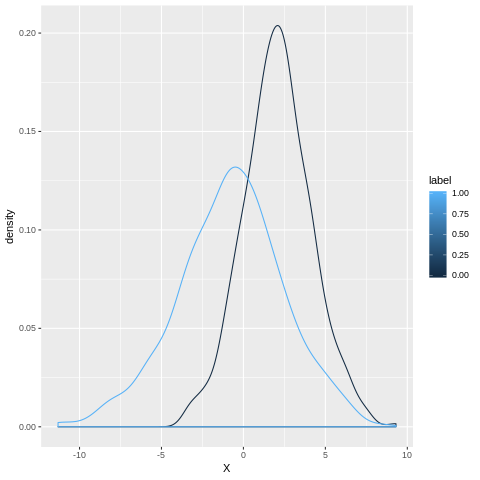

In [30]:
%%R



# First, we turn our "matrix" of data to a data frame, so that ggplot would be happy:
df <- as.data.frame(dat)


# Now we plot using X as an x-axis and we group the X-s by label, colouring the different labels differently:
ggplot(df, aes(x=X)) + geom_density(aes(group=label, colour=label))


# Your data consists of an "X" column and a "label" column
# Use ggplot to plot a kernel density estimate of each label (overlayed on the same plot)
# hint: don't forget to make sure the labels are factors!



# Problem 2: Using Classes in Python

In [31]:
from abc import ABC, abstractmethod
from math import sqrt

def smart_zip(a,b):
    try:
        return zip(a, b)
    except TypeError:
        return zip([a], [b])

class AbstractKNeighbors(ABC):
    def __init__(self, K):
        self.K = K

    def fit(self, X, y):
        """ Train the model!

        X should be a list of data points
        y should be a list of labels
        """
        self.X = X
        self.y = y
        return self

    @abstractmethod
    def _make_prediction(self, labels):
        pass

    def predict(self, new_x):
        """Find the nearest K neighbors
        
        new_x should be a single data point
        """

        dists = [sqrt(sum(([(i-j)**2 for i,j in smart_zip(x,new_x)])))
                 for x in self.X]
        sorted_neighbors = sorted(enumerate(dists),
                                  key=lambda t: t[1])
        labels = [self.y[i] for i,_ in sorted_neighbors]
        return self._make_prediction(labels)


class KNearestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[:self.K])/self.K
        return round(avg)

class KFurthestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[-self.K:])/self.K
        return round(1 - avg)

In [32]:
from csv import reader

with open('classification_data.csv', 'r') as f:
    dat = list(reader(f))[1:]
    dat = [[float(x), int(label)] for x,label in dat]

## Problem 2.1: Shuffling!

In [34]:
# In your data, "X" is a data point that is nothing more than
# a single number. 
# Shuffle your data into a random order (use random.shuffle!)
import numpy as np
np.random.shuffle(dat)
print(dat)
# Fair enough

[[-1.8501841232812422, 1], [2.125561369079985, 0], [-3.1172915455517147, 0], [-2.182004305819434, 0], [0.3337009447676118, 1], [1.981048176718918, 0], [5.106612788828363, 1], [-3.3565634861759746, 1], [-2.730135384654908, 1], [-1.3045408090446569, 0], [0.5714502685597682, 1], [-0.6350037501727901, 1], [2.0656086807361707, 1], [0.7463424899874371, 1], [4.993798975712915, 0], [1.977064952534832, 0], [1.6876002946126785, 1], [-2.840823354977209, 1], [-4.890095192777308, 1], [1.3881227803537368, 0], [2.268472337589985, 0], [2.8427968825597443, 0], [0.7482588017509331, 0], [-3.8953040740856824, 1], [2.738383515220932, 0], [2.8580869794262522, 0], [3.7633867025348344, 0], [-0.3878196276428961, 1], [0.23632440611254957, 1], [-0.7632882754845136, 1], [1.167770349614657, 0], [-0.584157566979947, 1], [2.41264501060219, 0], [0.34037659767191486, 1], [1.7173216486575686, 1], [2.036106217339574, 0], [1.440949367896684, 0], [-0.3812760970233029, 0], [-1.773774820903951, 1], [3.499638498576325, 0], [

In [122]:
# If you shuffled your data, this test should pass
# (i.e. not throw an error)

assert(sum([label for x,label in dat[:50]]) != 0)

## Problem 2.2: Splitting!

In [ ]:
# Split your data, which is now a list, into 2 sublists:
# "train" and "test"
# The "train" group should have 700 elements
# The test group should have 300 elements
# Each group should have the same format as the original data



In [ ]:
# Now you will need to make another split, within the groups!
# For each group ("train" and "test") split the X's from the labels.

## Problem 2.3: Testing models!

In [124]:
# For each model: 
# 1. Create an instance the class, with constructor parameters: K=5
# 2. Train the instance on the "train" groups X's and labels (y's)
# 3. Test how well the instance does: 
#    A. Use the trained instance to predict the label of each "X" in the "test" group
#    B. Use your "test" labels to see if the predicted label is equal the true label



In [ ]:
# Compare the two classes of models!